Taking data in CSV format from VNA and plotting the same graphs as the VNA does, this allows us to overlap more data onto one graph easily, the VNA can only store 1 curve + show the current displayed curve 


['C:/Users/TXB909/Documents/strain-cell/VNA_data+figures/Data/Co_coil_original_15_11_24.CSV', 'C:/Users/TXB909/Documents/strain-cell/VNA_data+figures/Data/Co_coil_double_turns_15_11_24.CSV', 'C:/Users/TXB909/Documents/strain-cell/VNA_data+figures/Data/Co_coil_half_diameter_15_11_24.CSV']


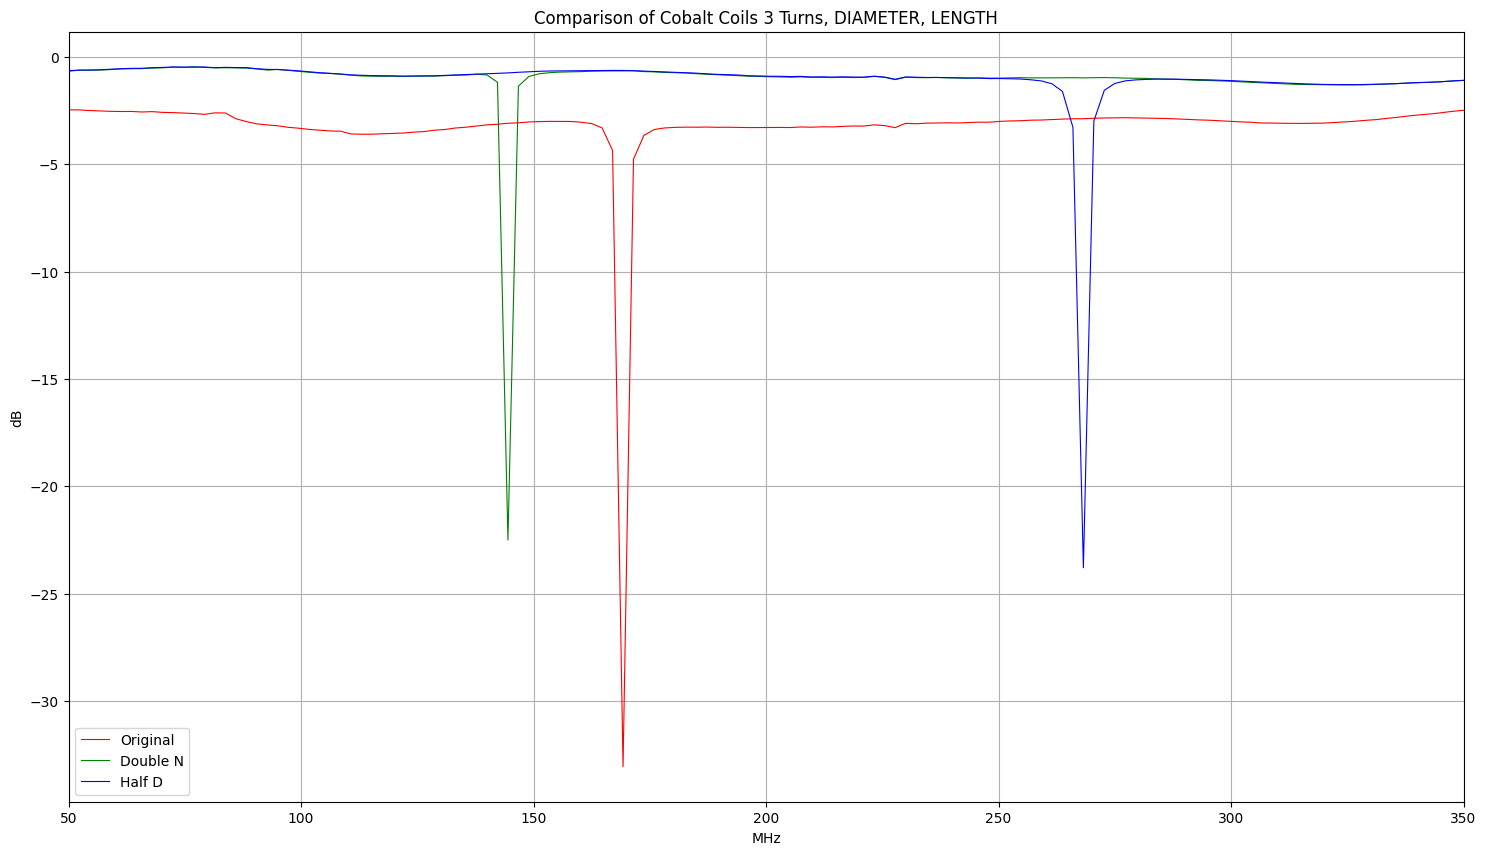

In [31]:
import pyvisa
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Filepath where the point the test datafile exists in so it can be accessed
filepaths = ["C:/Users/TXB909/Documents/strain-cell/VNA_data+figures/Data/","C:/Users/TXB909/Documents/strain-cell/VNA_data+figures/Data/",
            "C:/Users/TXB909/Documents/strain-cell/VNA_data+figures/Data/"]
files = ["Co_coil_original_15_11_24.CSV","Co_coil_double_turns_15_11_24.CSV","Co_coil_half_diameter_15_11_24.CSV"]

# Combine filepaths and filenames
fileandpath = []
for path, name in zip(filepaths, files):
    fileandpath.append(f"{path}{name}")

# Print the resulting list
print(fileandpath)

FILEANDPATH=fileandpath

'''
Fancy CGPT way of making dynamic variables globally. Its a bad idea for professional code but is okay here, you call the variables as df_raw_data_x where x is length of 
the FILEANDPATH array. The variable will be throw an error as 'undefined' 
'''
for i in range(len(FILEANDPATH)):
    locals()[f"df_raw_data_{i}"] = pd.read_csv(FILEANDPATH[i], sep=",", skiprows= 11)
    
    #df_raw_data_i = pd.read_csv(FILEANDPATH[i], sep=",", skiprows= 11)

def plot_data(df, x_column_title, y_column_title, title):
    x = df.loc[:,x_column_title]/10**6 #making it MHz by /10^6
    y = df.loc[:,y_column_title]
    fig = figure(figsize=(18,10))

    plt.scatter(x, y, s=10, 
                #c='r', 
            facecolors='none', edgecolors= 'b', label = 'Data Points')
    plt.plot(x, y, c='r', linewidth=0.8)
    plt.title(title)
    plt.xlabel('M'+x_column_title) #adding in M to show its MHz
    plt.ylabel(y_column_title)
    plt.grid('both')
    


x_column_title = 'Hz'
y_column_title ='dB'
title = 'Comparison of Cobalt Coils 3 Turns, DIAMETER, LENGTH'

x0 = df_raw_data_0.loc[:,x_column_title]/10**6 #making it MHz by /10^6
y0 = df_raw_data_0.loc[:,y_column_title]
x1 = df_raw_data_1.loc[:,x_column_title]/10**6 #making it MHz by /10^6
y1 = df_raw_data_1.loc[:,y_column_title]
x2 = df_raw_data_2.loc[:,x_column_title]/10**6 #making it MHz by /10^6
y2 = df_raw_data_2.loc[:,y_column_title]
fig = figure(figsize=(18,10))

#plt.scatter(x0, y0, s=10, 
            #c='r', 
        #facecolors='none', edgecolors= 'b', label = 'Data Points')
plt.plot(x0, y0, c='r', linewidth=0.8, label = 'Original')
plt.plot(x1, y1, c='g', linewidth=0.8, label = 'Double N')
plt.plot(x2, y2, c='b', linewidth=0.8, label = 'Half D')


plt.title(title)
plt.xlim(50,350)
plt.xlabel('M'+x_column_title) #adding in M to show its MHz
plt.ylabel(y_column_title)
plt.grid('both')
plt.legend()
#plot_data(df_raw_data_0,'Hz' ,'dB', 'test plot')
#plot_data(df_raw_data_1,'Hz' ,'dB', 'test plot')
#plot_data(df_raw_data_2,'Hz' ,'dB', 'test plot')
